Name : B. Ajay Martin Ferdinand




Dataset Used: Differentiated Thyroid Cancer Recurrence



Source: Dataset from UC Irvine Machine learning repositry

Objective:

*   This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

*   To detect whether thyroid is present or not







In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/almabetter

/content/drive/My Drive/almabetter


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Thyroid_Diff.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# DATA PREPROCESSING





1.   As we're approaching this using Logisitic Regrsision we need to convert columns to best featrues.
2.   Using encoder methods to transform.



In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
            'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
            'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

# Create a copy of the dataset to encode
df_encoded = df.copy()

# Encode each categorical column
encoder = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Save the transformed dataset as X
X = df_encoded[cat_cols]

# Display the transformed data
print(X.head())
y = encoder.fit_transform(df['Recurred'])
print(y)


   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   11       0        0           0                0                 2   
1   18       0        0           1                0                 2   
2   14       0        0           0                0                 2   
3   46       0        0           0                0                 2   
4   46       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  
0      0         2  
1      0         1  
2      0         1  
3      0         1  

# UBM analysis


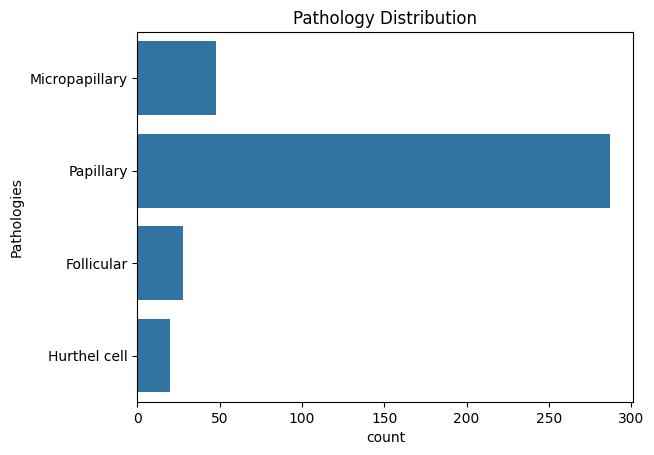

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Pathology'])
plt.xlabel('count')
plt.ylabel('Pathologies')
plt.title('Pathology Distribution')
plt.show()


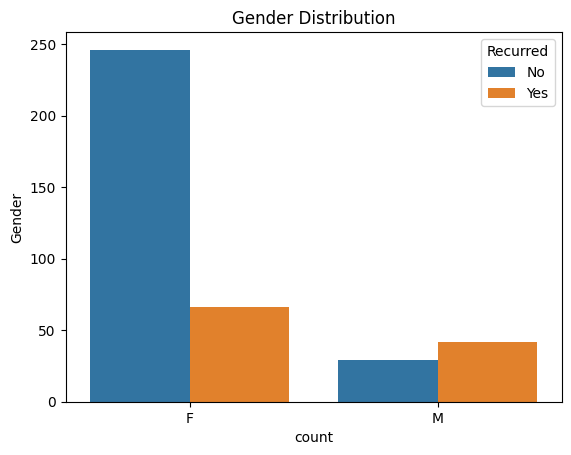

In [ ]:
sns.countplot(x = df['Gender'],hue =df_encoded['Recurred'])
plt.xlabel('count')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

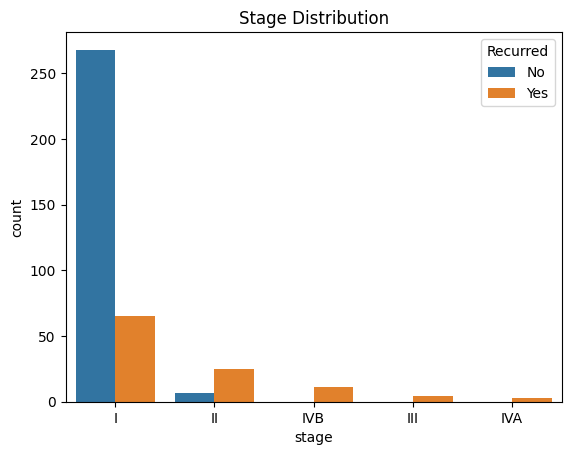

In [ ]:
sns.countplot(x = df['Stage'],hue =df_encoded['Recurred'])
plt.xlabel('stage')
plt.ylabel('count')
plt.title('Stage Distribution')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Euthyroid'),
  Text(1, 0, 'Clinical Hyperthyroidism'),
  Text(2, 0, 'Clinical Hypothyroidism'),
  Text(3, 0, 'Subclinical Hyperthyroidism'),
  Text(4, 0, 'Subclinical Hypothyroidism')])

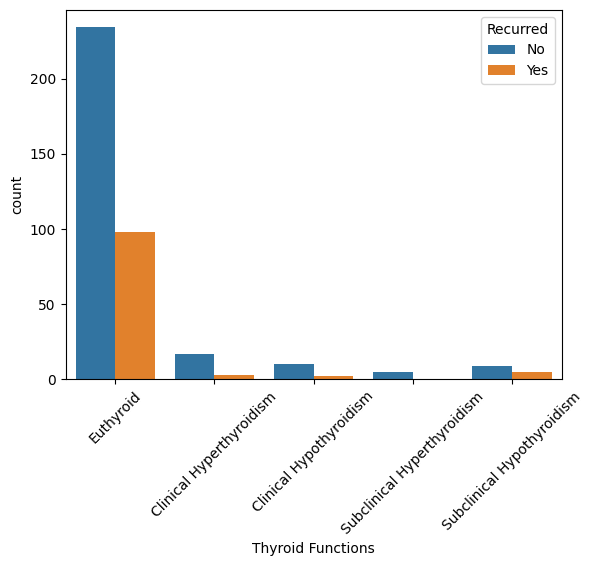

In [ ]:
sns.countplot(x = df['Thyroid Function'],hue =df_encoded['Recurred'])
plt.xlabel('Thyroid Functions')
plt.ylabel('count')
plt.xticks(rotation =45)


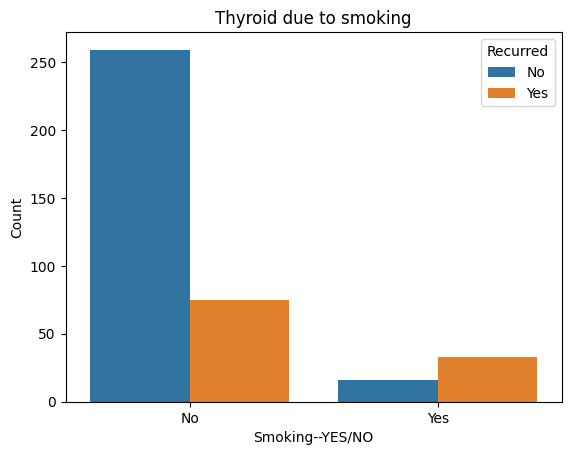

In [ ]:
sns.countplot(x = df['Smoking'],hue =df_encoded['Recurred'])
plt.xlabel('Smoking--YES/NO')
plt.ylabel('Count')
plt.title('Thyroid due to smoking')
plt.show()

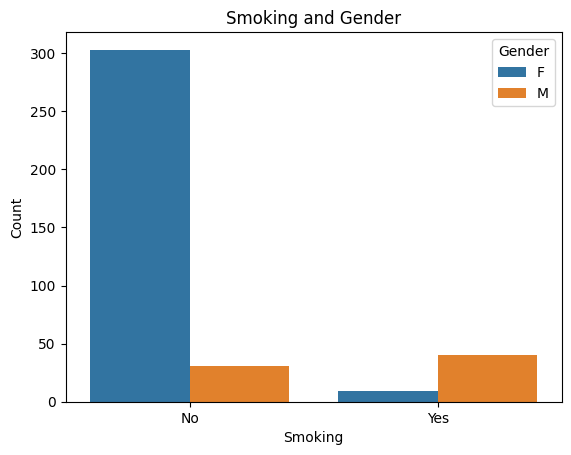

In [ ]:
sns.countplot(x=df['Smoking'] , hue = df['Gender'])
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Smoking and Gender')
plt.show()

**Interpretations from the analysis**:


*   Papillary pathology is common cause for thyroid.
*   Compared to men's , women's are affected by thyroid.
*   When a person has Type 1 or Type 2 stage then they are affected by thyroid.
*   A thyroid function Eyuthroid presents then there might be chances of getting affected by thyroid.
*   Most non smokers are affected by thyroid.
*   Men smoke more than women but most of them are not affected by thyroid.





# **Model Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape , y_train.shape

((306, 16), (306,))

In [ ]:
X_test.shape

(77, 16)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(solver='saga',max_iter=1000)

model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
preds = model.predict(X_test)

In [ ]:
acc_score = accuracy_score(y_test,preds)
print(acc_score)

0.922077922077922


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

In [ ]:
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")

Precision Score: 0.8823529411764706
Recall Score: 0.7894736842105263
F1 Score: 0.8333333333333334


In [ ]:
import pandas as pd

correlation_matrix = pd.DataFrame(X_train).corr()
correlation_matrix

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
Age,1.000000,0.121577,0.276606,0.106588,0.143233,0.022410,-0.034435,-0.091817,-0.187149,-0.198213,-0.284631,0.208133,0.053636,0.165598,0.512599,0.185287
Gender,0.121577,1.000000,0.594667,0.165963,0.214686,-0.007512,-0.061443,-0.198984,-0.039245,-0.174399,-0.280513,0.257590,0.214450,0.207521,0.213016,0.271441
Smoking,0.276606,0.594667,1.000000,0.257034,0.281928,-0.011051,-0.042235,-0.119565,-0.221631,-0.210459,-0.372663,0.388798,0.173937,0.334439,0.421095,0.238601
Hx Smoking,0.106588,0.165963,0.257034,1.000000,0.302026,-0.012924,-0.017514,-0.033617,-0.087028,0.034375,-0.105717,0.129089,0.034747,0.114637,0.245356,0.015575
Hx Radiothreapy,0.143233,0.214686,0.281928,0.302026,1.000000,-0.135854,0.011361,-0.031723,-0.136493,-0.084926,-0.266067,0.203969,0.068379,0.437666,0.469647,0.087582
Thyroid Function,0.022410,-0.007512,-0.011051,-0.012924,-0.135854,1.000000,0.113967,-0.034414,0.127527,-0.063438,-0.057060,0.036315,0.083542,0.017221,0.026675,0.019059
Physical Examination,-0.034435,-0.061443,-0.042235,-0.017514,0.011361,0.113967,1.000000,0.226556,-0.016901,0.317985,0.185047,-0.126671,-0.128190,0.020945,-0.102529,-0.110476
Adenopathy,-0.091817,-0.198984,-0.119565,-0.033617,-0.031723,-0.034414,0.226556,1.000000,0.011758,0.143936,0.165026,-0.196867,-0.104893,-0.096982,-0.154255,-0.156613
Pathology,-0.187149,-0.039245,-0.221631,-0.087028,-0.136493,0.127527,-0.016901,0.011758,1.000000,0.042680,0.035058,-0.014463,0.236216,-0.108422,-0.126801,0.000846
Focality,-0.198213,-0.174399,-0.210459,0.034375,-0.084926,-0.063438,0.317985,0.143936,0.042680,1.000000,0.419119,-0.404617,-0.367441,-0.171097,-0.300524,-0.348561


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Define Logistic Regression with more iterations
model1 = LogisticRegression(max_iter=1000, random_state=42)

# Define parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search
grid = GridSearchCV(model1, param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)

# Best model and evaluation
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
predictions = best_model.predict(X_test)
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))



Best Parameters: {'C': 10}
Precision: 0.9375
Recall: 0.7894736842105263
F1 Score: 0.8571428571428571


Steps Performed:

*   Since, Logisitic Regression produced a low performance model, Tuning the Hyperparameter by GridSearch method is implemented
*   After using that method too not produced good model.
*   So, Using RandomForest Classifier algorithm.






In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform Grid Search with cross-validation
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid.best_params_)

# Evaluate the best model on the test data
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

# Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy Score: 0.974025974025974
Precision Score: 0.9473684210526315
Recall Score: 0.9473684210526315
F1 Score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77




*   Since, this performed well and gives better score we using this model to predict test data.



In [ ]:
import joblib
joblib.dump(best_rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
loaded_model = joblib.load('random_forest_model.pkl')
predictions = loaded_model.predict(X_test)


visualizing important features which contribute more information.

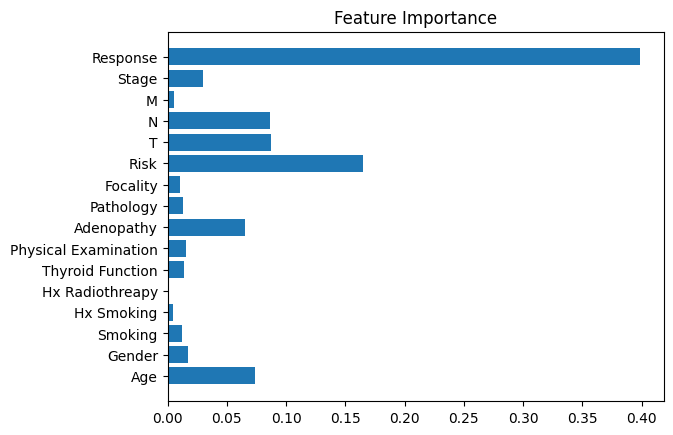

In [ ]:
import matplotlib.pyplot as plt
feature_names = X.columns.tolist()
importance = best_rf.feature_importances_
plt.barh(feature_names, importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
print(predictions)

[0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0]


In [ ]:
import numpy as np

y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Set a threshold value
threshold = 0.5

# Convert probabilities to 1 or 0 based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Map the predictions to "Yes" or "No"
y_pred_labels = np.where(y_pred == 1, "Yes", "No")

# Display the results
print(y_pred_labels)


['No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']


Just checking the probabilites value using predict_proba function

In [ ]:
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
print(y_pred_proba)

[0.   0.06 1.   0.66 0.   0.92 0.   0.   1.   0.66 0.52 0.   0.12 0.02
 0.   0.   0.   1.   0.88 0.   0.   0.   0.   0.   0.   0.02 0.   0.32
 0.02 0.8  0.02 0.   0.76 0.   0.   0.6  0.   0.08 0.9  1.   0.   0.
 0.   0.   0.   0.02 0.   0.   0.76 0.   0.02 0.   0.86 0.   0.   0.1
 0.06 0.   0.06 0.   0.   0.   0.   0.   0.86 0.12 0.96 0.   0.98 0.
 0.   0.   0.02 0.   0.04 0.88 0.2 ]


## **Conclusion:**


*   RandomForest Classifier Performs well for the predictions

*   Womens need more care for thyroid.
*   The risk for women is about 10 times higher than for men. One reason for this is that thyroid disorders are often triggered by autoimmune responses, which happen when the body's immune system starts to attack its own cells.

